<a href="https://colab.research.google.com/github/vedpd/Numpy_Pandas_Visualization/blob/main/TimeSerieswithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DateTime Index- part 1**

In [29]:
#Datetime index

from datetime import datetime

In [30]:
my_year=2020

my_month =1

my_day=2

my_hour=13

my_min=30

my_sec=15

In [31]:
my_date = datetime(my_year,my_month,my_day)

In [32]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [33]:
my_date_time= datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [34]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [35]:
my_date_time.day

2

In [36]:
my_date_time.hour

13

In [37]:
type(my_date)

datetime.datetime

In [38]:
# numpy handles date time much better
import numpy as np

In [39]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64')

#D below means numpy has applied day level precision

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [40]:
#only keep years
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [41]:
#Numpy date ranges
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [42]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

# **DateTime Index Part 2**

In [43]:
import pandas as pd

In [44]:
pd.date_range('2020-01-01',periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('Jan 01, 2018',periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.to_datetime(['1/2/2018','Jan 03, 2018']) # pass iterable object into this

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [47]:
# non US
pd.to_datetime(['2/1/2018','3/1/2018'], format= "%d/%m/%Y")

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [48]:
# non US. different format
pd.to_datetime(['2--1--2018','3--1--2018'], format= "%d--%m--%Y")

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [49]:
# pandas date time analysis


data= np.random.randn(3,2)

cols =['A','B']

print(data)

[[ 2.02608238  0.40929332]
 [ 0.68560374  0.46256942]
 [ 0.15008171 -0.16644563]]


In [50]:
idx= pd.date_range('2020-01-01',periods=3,freq='D')

df=pd.DataFrame(data,index= idx, columns=cols)

In [51]:
df

,A,B
2020-01-01,2.026082,0.409293
2020-01-02,0.685604,0.462569
2020-01-03,0.150082,-0.166446


In [52]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [53]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [54]:
df.index.argmax()

2

In [55]:
df.index.argmin(), df.index.min()

(0, Timestamp('2020-01-01 00:00:00', freq='D'))

# **Time Resampling**

Grouping the data based on the date

In [56]:
df= pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [57]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [59]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [60]:
#resample data based on time

#daily --> yearly data
df.resample(rule='A').mean()
#rule parameter tells how to aggregate

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [61]:
#Custom resampling

def first_day(entry):

  # Is there an entry?
  if len(entry):
    #return first entry
    return entry[0]

In [62]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [63]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [64]:
# Plotting

df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


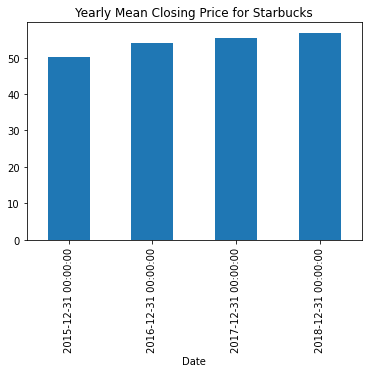

In [65]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks')

#resample is possible on series as well

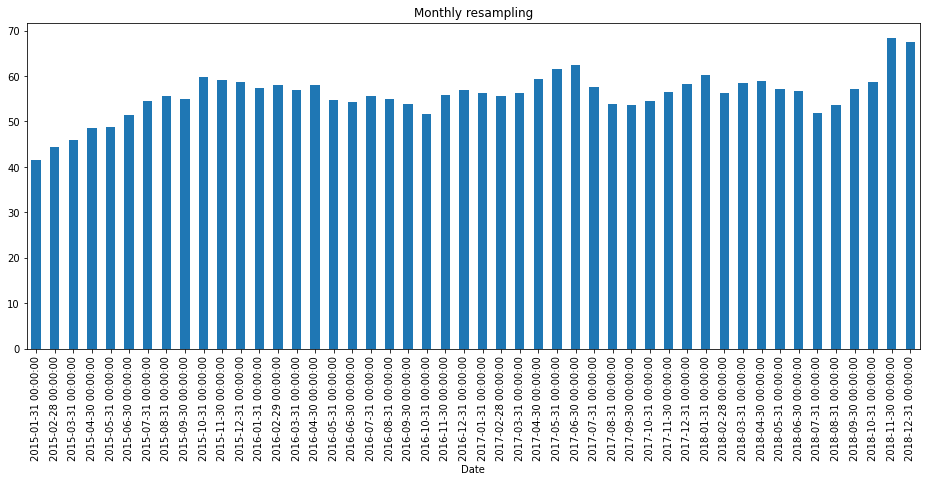

In [66]:
#resampling on months

df['Close'].resample('M').max().plot.bar(figsize=(16,6), title='Monthly resampling')

# **Time Shifting**

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [69]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [70]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [71]:
#shifting certain number of rows
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [72]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [73]:
df.shift(5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


In [74]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [75]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [76]:
#shift based on time series freqeuncy codes
#shift everything  forward by 1 month

df.shift(periods=1, freq= 'M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [77]:
df.shift(1,fill_value='None').head()

,Close,Volume
Date,,
2015-01-02,None,None
2015-01-05,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554


# **Rolling and Expanding**

1. Define a window 
2. Build moving average


Expanding - keep adding each row and build averages

In [78]:
import pandas as pd

%matplotlib inline

In [79]:
df.head(2)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796


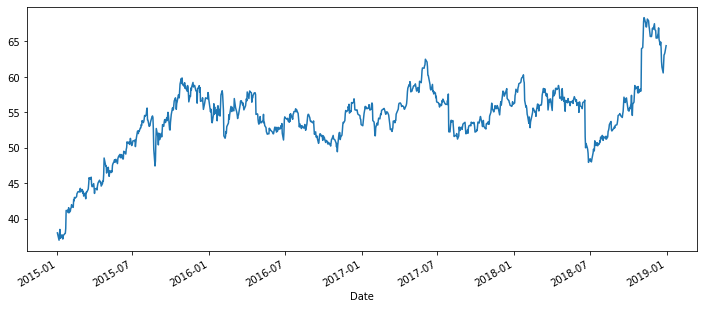

In [80]:
df['Close'].plot(figsize=(12,5))

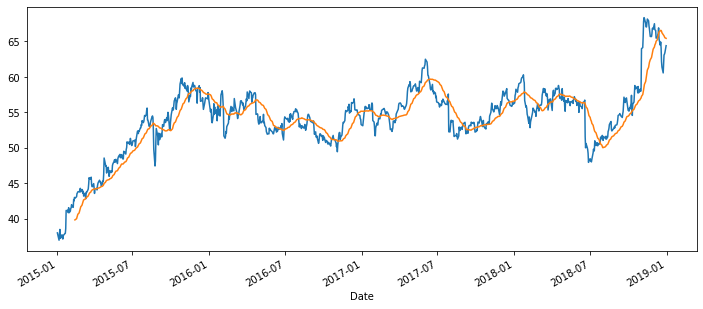

In [81]:
#add a rolling mean for say - 30 day window

df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

# with increase in window , the plot becomes more smooth/generalise trend

In [82]:
df['Close : 30 Day Mean'] = df['Close'].rolling(window=30).mean()

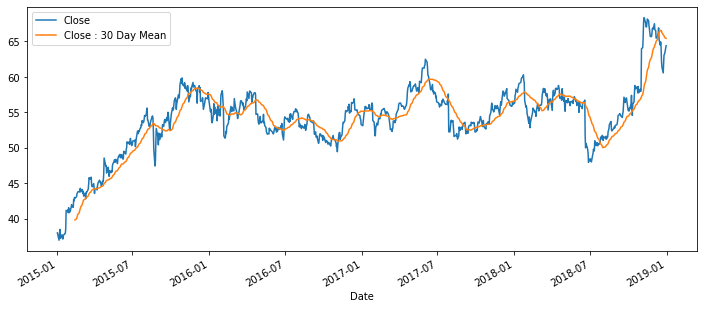

In [83]:
df[['Close','Close : 30 Day Mean']].plot(figsize=(12,5))

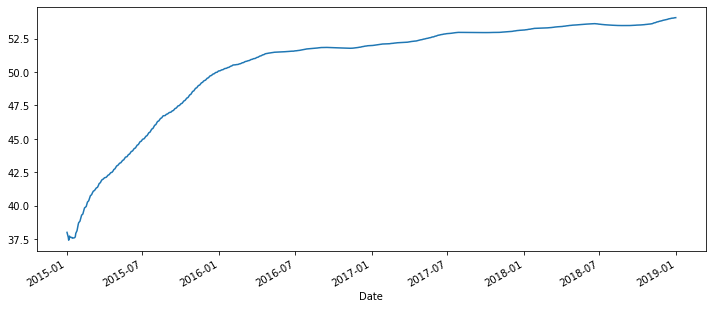

In [85]:
#expanding

df['Close'].expanding().mean().plot(figsize=(12,5))